<h1>Analisis harga rumah di rumahcom tangsel city</H1>
<h4>Data Dan sumber</h4>
<hr></hr>
<br>
sumber data : https://www.kaggle.com/datasets/gerryzani/housing-price-in-south-tangerang-city-indonesia
Dataset Informasi:

* nav-link href: links dari advertisement
* listing-location: alamat dari temapt yang di jual
* price: harga property
* bed: jumlah kamar tidur di property
* bath: jumlah kamar tidur di the property
* listing-floorarea: ukuran tanah di meter persegi
* listing-floorarea 2: harga permeter persegi

<h2>Importing</h2>

In [2]:
import pandas as pd
import re
import numpy as np
import locale

import matplotlib.pyplot as plt
import seaborn as sns

<h2>Explorasi data</h2>
<hr>

In [3]:
data = pd.read_csv(r'190623_rumahcom_tangsel_city_unfiltered.csv', encoding='latin-1')
df = pd.DataFrame(data)
df.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29420 entries, 0 to 29419
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nav-link href        29420 non-null  object 
 1   listing-location     29420 non-null  object 
 2   price                29420 non-null  object 
 3   bed                  29282 non-null  float64
 4   bath                 29215 non-null  float64
 5   listing-floorarea    29420 non-null  object 
 6   listing-floorarea 2  29383 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.6+ MB


In [5]:
df.describe()

,bed,bath
count,29282.000000,29215.000000
mean,3.754457,2.986137
std,1.356762,1.359788
min,1.000000,1.000000
25%,3.000000,2.000000
50%,4.000000,3.000000
75%,4.000000,4.000000
max,10.000000,10.000000


In [6]:
df.shape

(29420, 7)

In [7]:
df.columns

Index(['nav-link href', 'listing-location', 'price', 'bed', 'bath',
       'listing-floorarea', 'listing-floorarea 2'],
      dtype='object')

In [8]:
type(df.columns.values)

numpy.ndarray

Data memliki 29420 baris dan 7 kolom ('nav-link href', 'listing-location', 'price', 'bed', 'bath',
       'listing-floorarea', 'listing-floorarea 2')

In [9]:
df.isna().sum()

nav-link href            0
listing-location         0
price                    0
bed                    138
bath                   205
listing-floorarea        0
listing-floorarea 2     37
dtype: int64

Terdapat data kosong pada kolom 'bad'=138,'bath'=205,'listing-floorarea 2'= 37

<h2>Membersihkan data </h2>

dari hasil analisi bentuk data di atas di temukan beberapa kolam yang tidak sesuai untuk mempermudah kita akan fixtype data


In [10]:
print("sebelum drop nav-link href :", data.shape)
df = df.drop(["nav-link href"] ,axis= 1)

sebelum drop nav-link href : (29420, 7)


In [11]:
print("sesudah drop nav-link href :", df.shape)

sesudah drop nav-link href : (29420, 6)


<h2>Bed & Bath column missing values handling</h2>

Untuk bad dan bath saya menggunakan metode Interpolate Missing Values untuk memperkirakan dan mengisi nilai yang hilang berdasarkan data yang tersedia.

In [12]:
df['bed'].interpolate(method='linear', inplace=True)
df['bath'].interpolate(method='linear', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4472\1165734804.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bed'].interpolate(method='linear', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4472\1165734804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [13]:
df.isna().sum()

listing-location        0
price                   0
bed                     0
bath                    0
listing-floorarea       0
listing-floorarea 2    37
dtype: int64

<h2>data wrangling </h2>

<h3> merubah nilai pada price menjadi data  numerik agar lebih mudah di baca</h3>

In [14]:
# Fungsi untuk menghapus karakter non-numerik dan mengonversi ke float
def convert_to_numeric(value):
    try:
        # Handle ranges
        if '-' in value:
            parts = value.split('-')
            parts = [re.sub(r'[^\d.,Mjt]', '', part).strip() for part in parts]
            parts = [convert_to_float(part) for part in parts]
            return sum(parts) / len(parts)
        # Handle individual values
        value = re.sub(r'[^\d.,Mjt]', '', value).strip()
        return convert_to_float(value)

    except ValueError as e:
        print(f"Error parsing value: {value} - {e}")
        return None

def convert_to_float(value):
    if 'M' in value:
        value = value.replace('M', '')
        value = value.replace(',', '.')  # Replace comma with dot for float conversion
        return float(value)* 1000_000_000
    elif 'jt' in value:
        value = value.replace('jt', '')
        value = value.replace(',', '.')  # Replace comma with dot for float conversion
        return float(value)* 1000_000
    else:
        value = value.replace(',', '.')  # Replace comma with dot for float conversion
        return float(value)



<div class="alert alert-block alert-warning">
<b>catatan:</b> Jika kode untuk menghapus koma dan mengonversi ke float tidak memberikan hasil yang diharapkan, ada kemungkinan beberapa data dalam kolom price tidak berformat string atau memiliki masalah lain yang mempengaruhi konversi. Pastikan semua data dalam kolom tersebut adalah string sebelum melakukan konversi.

In [15]:
# Terapkan fungsi ke kolom 'Harga'
df['price'] = df['price'].apply(convert_to_numeric)

# Mengubah tipe data kolom 'price' menjadi string, menghapus koma, dan mengonversi ke float
df['price'] = df['price'].astype(str).str.replace(',', '').astype(float)

# Jika Anda perlu menampilkan atau menyimpan data dengan format ribuan (misalnya untuk laporan), lakukan format tersebut pada saat itu:
df['price_formatted'] = df['price'].apply(lambda x: '{:,.0f}'.format(x))


<h3>listing-floorarea menjadi numeric</h3>

In [16]:
df['listing-floorarea'] = df['listing-floorarea'].str.replace(' m²', '')
df['listing-floorarea'] = pd.to_numeric(df['listing-floorarea'])

<h3>merubah listing-floorarea 2 nama dan bentuk</h3>

In [17]:
# Set locale to Indonesian
locale.setlocale(locale.LC_ALL, 'id_ID.UTF-8')
# Fungsi untuk menghapus karakter non-numerik dan mengonversi ke integer
def convert_to_numeric_1(value):
    if isinstance(value, str):
        numeric_string = re.sub(r'[^\d.]', '', value)
        return int(locale.atof(numeric_string))  # Konversi eksplisit ke integer
    else:
        return value
# Terapkan fungsi ke kolom 'Harga'
df['listing-floorarea 2']  = df['listing-floorarea 2'].apply(convert_to_numeric_1)
# hapus data yang kosong
df = df.dropna()
# ubah menjadi interger
df['listing-floorarea 2']  = df['listing-floorarea 2'].astype(int)

In [18]:
df.rename(columns={'listing-floorarea 2': 'harga_permeter_persegi'}, inplace=True)

<div class="alert alert-block alert-warning">
<b>Example:</b> 6.900000e+09 adalah notasi ilmiah yang mewakili angka 6,900,000,000 atau enam miliar sembilan ratus juta.
<br>
9.500000e+08 adalah notasi ilmiah yang mewakili angka 950,000,000 atau sembilan ratus lima puluh juta.
</div>

In [19]:

df['bed'] = df['bed'].astype(float)
df['bath'] = df['bath'].astype(float)
df['listing-floorarea'] = df['listing-floorarea'].astype(float)
df['harga_permeter_persegi'] = df['harga_permeter_persegi'].astype(float)


In [20]:
df

,listing-location,price,bed,bath,listing-floorarea,harga_permeter_persegi,price_formatted
0,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420.0,20720721.0,"6,900,000,000"
1,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190.0,12747875.0,"4,500,000,000"
2,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132.0,30859375.0,"3,950,000,000"
3,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220.0,18333333.0,"3,300,000,000"
4,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180.0,27777778.0,"3,500,000,000"
...,...,...,...,...,...,...,...
29415,"Bintaro, Tangerang Selatan, Banten",3.300000e+09,3.0,3.0,300.0,21710526.0,"3,300,000,000"
29416,"Bintaro, Tangerang Selatan, Banten",4.000000e+09,8.0,4.0,330.0,36363636.0,"4,000,000,000"
29417,"Bintaro, Tangerang Selatan, Banten",2.200000e+09,3.0,2.0,160.0,18333333.0,"2,200,000,000"
29418,"Bintaro, Tangerang Selatan, Banten",1.950000e+09,3.0,2.0,120.0,21666667.0,"1,950,000,000"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29383 entries, 0 to 29419
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing-location        29383 non-null  object 
 1   price                   29383 non-null  float64
 2   bed                     29383 non-null  float64
 3   bath                    29383 non-null  float64
 4   listing-floorarea       29383 non-null  float64
 5   harga_permeter_persegi  29383 non-null  float64
 6   price_formatted         29383 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


In [22]:
df.isnull().sum()   

listing-location          0
price                     0
bed                       0
bath                      0
listing-floorarea         0
harga_permeter_persegi    0
price_formatted           0
dtype: int64

In [23]:
df.shape

(29383, 7)

In [24]:
df

,listing-location,price,bed,bath,listing-floorarea,harga_permeter_persegi,price_formatted
0,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420.0,20720721.0,"6,900,000,000"
1,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190.0,12747875.0,"4,500,000,000"
2,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132.0,30859375.0,"3,950,000,000"
3,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220.0,18333333.0,"3,300,000,000"
4,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180.0,27777778.0,"3,500,000,000"
...,...,...,...,...,...,...,...
29415,"Bintaro, Tangerang Selatan, Banten",3.300000e+09,3.0,3.0,300.0,21710526.0,"3,300,000,000"
29416,"Bintaro, Tangerang Selatan, Banten",4.000000e+09,8.0,4.0,330.0,36363636.0,"4,000,000,000"
29417,"Bintaro, Tangerang Selatan, Banten",2.200000e+09,3.0,2.0,160.0,18333333.0,"2,200,000,000"
29418,"Bintaro, Tangerang Selatan, Banten",1.950000e+09,3.0,2.0,120.0,21666667.0,"1,950,000,000"


<h3>Memfileter data berdasarkan kecamatan , kelurahan dan tempatnya</h3>

In [25]:
kecamatan_list = ['Ciputat', 'Ciputat Timur', 'Pamulang', 'Pondok Aren', 'Serpong', 'Serpong Utara', 'Setu']
kelurahan_list = ['Cempaka Putih', 'Ciputat', 'Ciputat Timur', 'Gandaria', 'Bambu Apus', 'Jaya Baru',
                  'Pondok Aren', 'Pondok Jaya', 'Lengkong Gudang', 'Pd. Jagung', 'Serpong Utara',
                  'Serpong', 'Benda', 'Bintaro']
residential_area = ["Bintaro", "BSD", "Pamulang", "Cirendeu", "Gading Serpong", "Serpong", "Alam Sutera"]

In [26]:
def extract_kecamatan(listing_location, kecamatan_list):
    for kecamatan in kecamatan_list:
        if kecamatan.lower() in listing_location.lower():
            return kecamatan
    return None

def extract_kelurahan(listing_location, kelurahan_list):
    for kelurahan in kelurahan_list:
        if kelurahan.lower() in listing_location.lower():
            return kelurahan
    return None

def extract_area(listing_location, residential_area):
    for area in residential_area:
        if area.lower() in listing_location.lower():
            return area
    return None


In [27]:
df["district"] = df["listing-location"].apply(lambda x: extract_kecamatan(x, kecamatan_list))

df["sub-district"] = df["listing-location"].apply(lambda x: extract_kelurahan(x, kelurahan_list))

df["area"] = df["listing-location"].apply(lambda x: extract_area(x, residential_area))

In [28]:
df.head()

,listing-location,price,bed,bath,listing-floorarea,harga_permeter_persegi,price_formatted,district,sub-district,area
0,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420.0,20720721.0,"6,900,000,000",Serpong,Serpong,Gading Serpong
1,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190.0,12747875.0,"4,500,000,000",Serpong,Serpong,Gading Serpong
2,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132.0,30859375.0,"3,950,000,000",Serpong,Serpong,Gading Serpong
3,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220.0,18333333.0,"3,300,000,000",Serpong,Serpong,Gading Serpong
4,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180.0,27777778.0,"3,500,000,000",Serpong,Serpong,Gading Serpong


In [29]:
df.describe()

,price,bed,bath,listing-floorarea,harga_permeter_persegi
count,2.938300e+04,29383.000000,29383.000000,29383.000000,2.938300e+04
mean,3.565926e+09,3.754977,2.986029,220.495116,1.783200e+07
std,6.813607e+09,1.355083,1.357079,3397.802565,6.070891e+07
min,1.000000e+00,1.000000,1.000000,1.000000,-2.147484e+09
25%,1.350000e+09,3.000000,2.000000,80.000000,1.315000e+07
50%,2.450000e+09,4.000000,3.000000,140.000000,1.833333e+07
75%,4.300000e+09,4.000000,4.000000,236.000000,2.419236e+07
max,8.500000e+11,10.000000,10.000000,400000.000000,1.312500e+09


In [40]:
df.to_csv("cleaned_property_data.csv", index= False, encoding= "utf-8")

<h2>Visualization</h2>

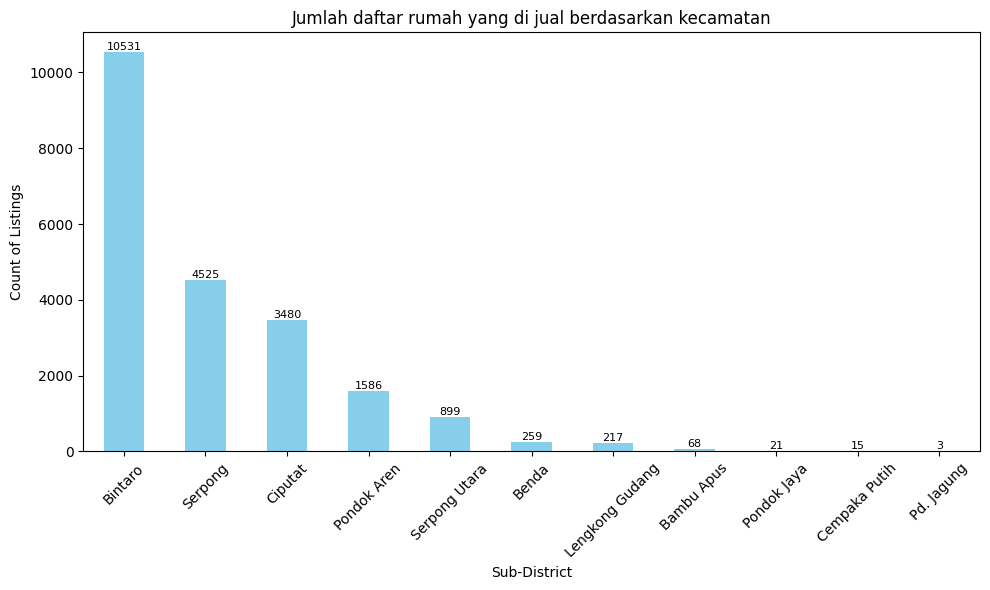

In [30]:
subdistrict_counts = df['sub-district'].value_counts()

plt.figure(figsize=(10, 6))
bars = subdistrict_counts.plot(kind='bar', color='skyblue')

for bar, count in zip(bars.patches, subdistrict_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom', fontsize=8)
    
plt.title('Jumlah daftar rumah yang di jual berdasarkan kecamatan')
plt.xlabel('Sub-District')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Penjelasan : Perbedaan jumlah listing antara Bintaro dan sub-distrik lainnya sangat mencolok. Ini menunjukkan bahwa Bintaro mungkin merupakan area yang sangat populer atau memiliki perkembangan properti yang pesat.
Empat sub-distrik teratas (Bintaro, Serpong, Ciputat, dan Pondok Aren) memiliki jumlah listing yang jauh lebih tinggi dibandingkan sub-distrik lainnya.

Total listing by Area

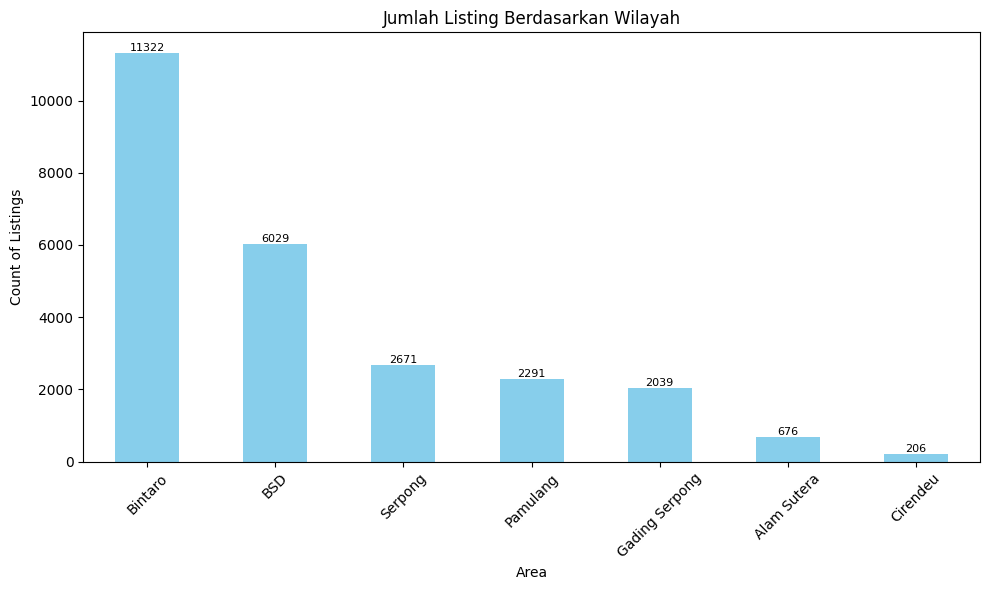

In [37]:
area_counts = df['area'].value_counts()

plt.figure(figsize=(10, 6))
bars = area_counts.plot(kind='bar', color='skyblue')

for bar, count in zip(bars.patches, area_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom', fontsize=8)

plt.title('Jumlah Listing Berdasarkan Wilayah')
plt.xlabel('Area')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

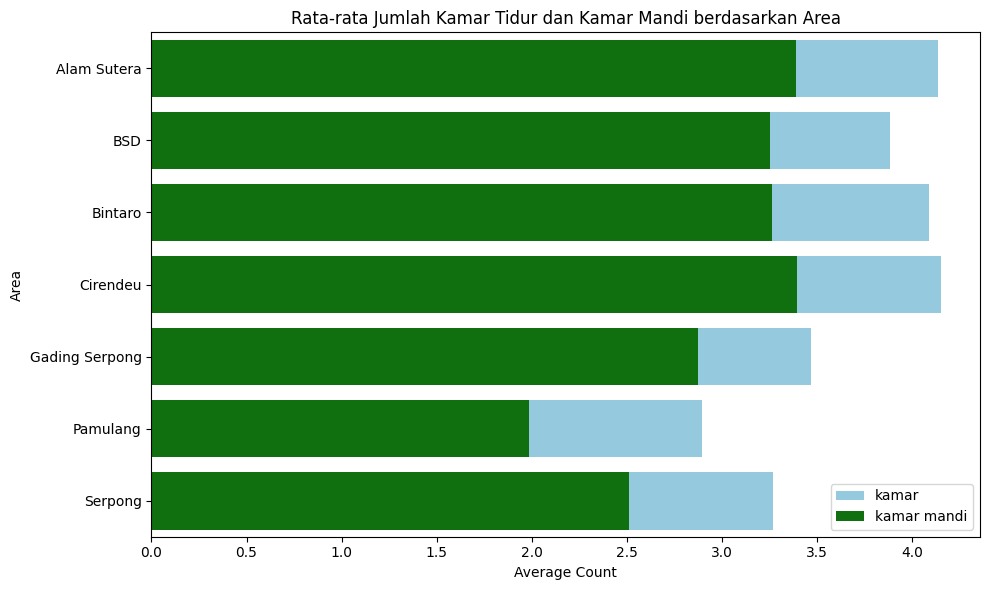

In [35]:
avg_data = df.groupby('area')[['bed','bath']].mean().reset_index()


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='bed', y='area', data=avg_data, color='skyblue', label='kamar')
sns.barplot(x='bath', y='area', data=avg_data, color='green', label='kamar mandi')
plt.xlabel('Average Count')
plt.ylabel('Area')
plt.title('Rata-rata Jumlah Kamar Tidur dan Kamar Mandi berdasarkan Area')
plt.legend()
plt.tight_layout()
plt.show()

Diagram ini memberikan gambaran umum mengenai perbandingan rata-rata jumlah kamar tidur dan kamar mandi di berbagai area. 

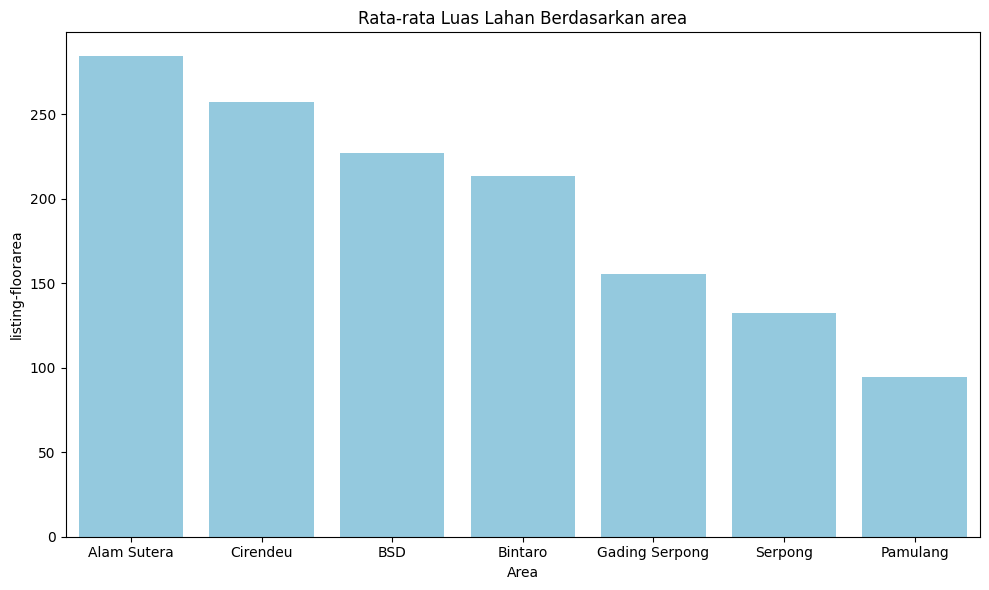

In [36]:
avg_landsize = df.groupby('area')['listing-floorarea'].mean().reset_index()

avg_landsize = avg_landsize.sort_values(by='listing-floorarea', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='area', y='listing-floorarea', data=avg_landsize, color='skyblue')
plt.xlabel('Area')
plt.ylabel('listing-floorarea')
plt.title('Rata-rata Luas Lahan Berdasarkan area')
plt.tight_layout()
plt.show()

Alam Sutera menonjol dengan rata-rata luas lahan tertinggi, sementara Pamulang memiliki rata-rata terendah.

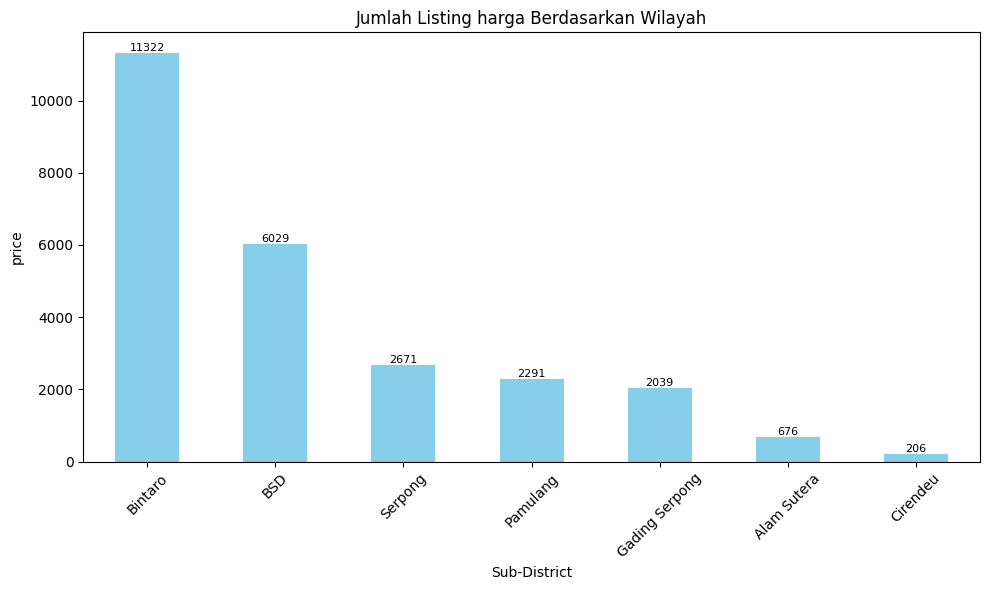

In [41]:
area_counts = df['area'].value_counts()

plt.figure(figsize=(10, 6))
bars = area_counts.plot(kind='bar', color='skyblue')

for bar, count in zip(bars.patches, area_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom', fontsize=8)

plt.title('Jumlah Listing harga Berdasarkan Wilayah')
plt.xlabel('Sub-District')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()